| **Inicio** | **atrás 32** | **Siguiente 34** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./32_Time_Series.ipynb)| [⏩](./34_Data_normalization.ipynb)|

# **33. Underfitting and Overfitting**

**Terminología:**

1. **Underfitting (Subajuste):**

 Ocurre cuando un modelo es demasiado simple para capturar la estructura subyacente de los datos. El modelo no se ajusta lo suficiente y tiene un rendimiento deficiente tanto en los datos de entrenamiento como en los de prueba.

2. **Overfitting (Sobreajuste):**

 Ocurre cuando un modelo es demasiado complejo y se ajusta demasiado a los datos de entrenamiento, incluso a patrones aleatorios o ruido. Aunque el modelo tiene un rendimiento excelente en los datos de entrenamiento, su rendimiento en nuevos datos (datos de prueba) suele ser pobre.

**Causas:**

- **Underfitting:** Puede deberse a un modelo demasiado simple, falta de características relevantes o una baja complejidad.

- **Overfitting:** Puede deberse a un modelo demasiado complejo, un exceso de características o un ajuste demasiado preciso a los datos de entrenamiento.

**Fórmulas:**

1. **Error Total:**

   $\text{Error Total} = \text{Error de Sesgo} + \text{Error de Varianza} + \text{Error Irreducible}$

2. **Error de Sesgo (Bias):**

   $\text{Error de Sesgo} = \frac{1}{N} \sum_{i=1}^{N} (\hat{f}(x_i) - f(x_i))^2$

3. **Error de Varianza:**

   $\text{Error de Varianza} = \frac{1}{N} \sum_{i=1}^{N} \text{Var}(\hat{f}(x_i))$

   **Donde:**

   - $\hat{f}(x_i)$ es la predicción del modelo para el ejemplo $( x_i )$.
   - $f(x_i)$ es el valor real.

**Ejemplo con Gráfico en Python:**

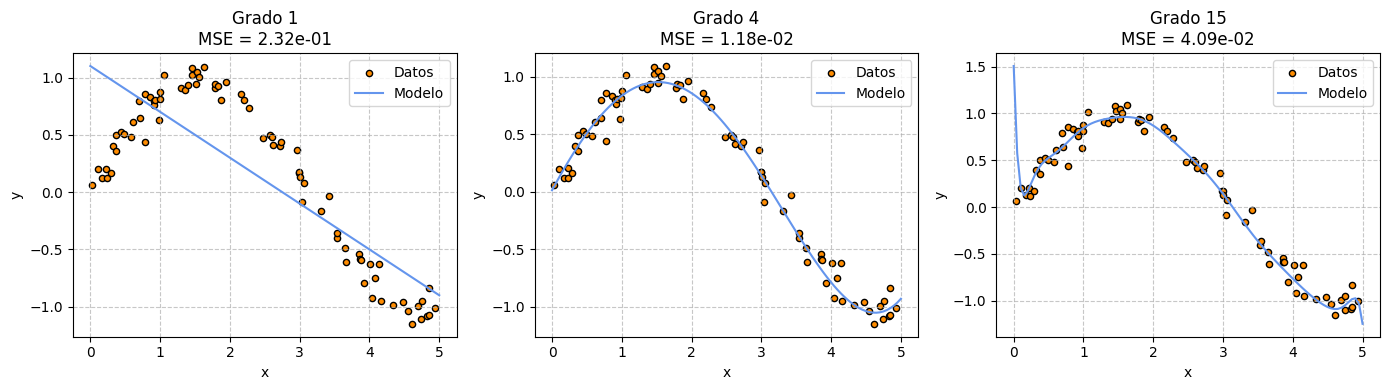

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Crear datos de ejemplo
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir funciones para ajustar modelos polinómicos
def fit_polynomial(degree):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model.fit(X_train, y_train)
    return model

# Personalizar la apariencia de las gráficas
degrees = [1, 4, 15]
plt.figure(figsize=(14, 4))

for i, degree in enumerate(degrees):
    plt.subplot(1, len(degrees), i + 1)
    model = fit_polynomial(degree)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    # Gráfico de dispersión de datos
    plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Datos")
    
    # Gráfico de la regresión polinómica
    x_plot = np.linspace(0, 5, 100)
    plt.plot(x_plot, model.predict(x_plot[:, np.newaxis]), color="cornflowerblue", label="Modelo")
    
    # Personalizar el título y las etiquetas de los ejes
    plt.title(f"Grado {degree}\nMSE = {mse:.2e}")
    plt.xlabel("x")
    plt.ylabel("y")
    
    # Añadir leyenda
    plt.legend(loc="best")

    # Añadir cuadrícula
    plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar el diseño de las subgráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()

En este ejemplo, se ajustan modelos polinómicos de diferentes grados a un conjunto de datos. Se observa que un modelo lineal (grado 1) no se ajusta lo suficiente (underfitting), un modelo polinómico de grado 4 tiene un buen ajuste y un modelo polinómico de grado 15 se ajusta demasiado a los datos (overfitting).

| **Inicio** | **atrás 32** | **Siguiente 34** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./32_Time_Series.ipynb)| [⏩](./34_Data_normalization.ipynb)|